In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and preprocess data
data = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])



11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Custom callback to track unchanged weights
class WeightChangeTracker(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        # Save initial weights
        self.initial_weights = [layer.get_weights() for layer in self.model.layers if len(layer.get_weights()) > 0]

    def on_epoch_end(self, epoch, logs=None):
        unchanged_weights = []
        current_weights = [layer.get_weights() for layer in self.model.layers if len(layer.get_weights()) > 0]
        print('\n')

        for i, (initial_layer_weights, current_layer_weights) in enumerate(zip(self.initial_weights, current_weights)):
            unchanged = 0
            for w_init, w_curr in zip(initial_layer_weights, current_layer_weights):
                unchanged += np.sum(w_init == w_curr)  # Count unchanged weights

            unchanged_weights.append(unchanged)
            print(f'Epoch {epoch + 1}, Layer {i + 1}: {unchanged} unchanged weights')

        # Update the initial weights for the next epoch
        self.initial_weights = current_weights

# Fit the model with the custom callback
model.fit(training_images, training_labels, epochs=10, callbacks=[WeightChangeTracker()])

# Evaluate the model
model.evaluate(test_images, test_labels)


Epoch 1/10
1854/1875 [============================>.] - ETA: 0s - loss: 0.2619 - accuracy: 0.9250

Epoch 1, Layer 1: 12051 unchanged weights
Epoch 1, Layer 2: 0 unchanged weights
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2608 - accuracy: 0.9253
Epoch 2/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.1173 - accuracy: 0.9648

Epoch 2, Layer 1: 14334 unchanged weights
Epoch 2, Layer 2: 30 unchanged weights
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1173 - accuracy: 0.9648
Epoch 3/10
1858/1875 [============================>.] - ETA: 0s - loss: 0.0799 - accuracy: 0.9757

Epoch 3, Layer 1: 15233 unchanged weights
Epoch 3, Layer 2: 42 unchanged weights
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0801 - accuracy: 0.9756
Epoch 4/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.0605 - accuracy: 0.9814

Epoch 4, Layer 1: 15410 unchanged weights
Epoch 4, Layer 2: 43 unchanged weights
1875/187

[0.08028954267501831, 0.9772999882698059]

assign id to weights and how many times they changed

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and preprocess data
data = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Custom callback to track unchanged weights with their IDs
class WeightChangeTracker(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        # Save initial weights and assign unique IDs to each weight
        self.initial_weights = []
        self.weight_ids = []
        id_counter = 0
        for layer in self.model.layers:
            layer_weights = layer.get_weights()
            if len(layer_weights) > 0:
                weight_with_ids = []
                for weights in layer_weights:
                    ids = np.arange(id_counter, id_counter + weights.size).reshape(weights.shape)
                    weight_with_ids.append(ids)
                    id_counter += weights.size
                self.weight_ids.append(weight_with_ids)
                self.initial_weights.append(layer_weights)

    def on_epoch_end(self, epoch, logs=None):
        current_weights = [layer.get_weights() for layer in self.model.layers if len(layer.get_weights()) > 0]

        print(f"\nEpoch {epoch + 1}:")
        for layer_idx, (initial_layer_weights, current_layer_weights, layer_weight_ids) in enumerate(
            zip(self.initial_weights, current_weights, self.weight_ids)):
            unchanged_weight_ids = []
            for init_weights, curr_weights, weight_ids in zip(initial_layer_weights, current_layer_weights, layer_weight_ids):
                unchanged_mask = (init_weights == curr_weights)
                unchanged_ids = weight_ids[unchanged_mask]  # Extract IDs of unchanged weights
                unchanged_weight_ids.extend(unchanged_ids.tolist())

            print(f"Layer {layer_idx + 1}: {len(unchanged_weight_ids)} unchanged weights, IDs: {unchanged_weight_ids}")

        # Update the initial weights for the next epoch
        self.initial_weights = current_weights

# Fit the model with the custom callback
model.fit(training_images, training_labels, epochs=10, callbacks=[WeightChangeTracker()])

# Evaluate the model
model.evaluate(test_images, test_labels)


Epoch 1/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.2600 - accuracy: 0.9261
Epoch 1:
Layer 1: 11402 unchanged weights, IDs: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192

[0.07589410990476608, 0.9779000282287598]

Plot histogram of weights

Epoch 1/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.2654 - accuracy: 0.9251
Epoch 1:


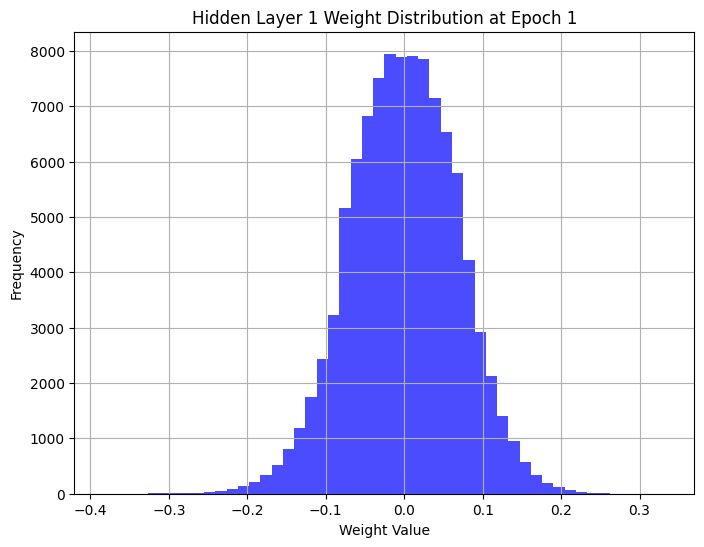

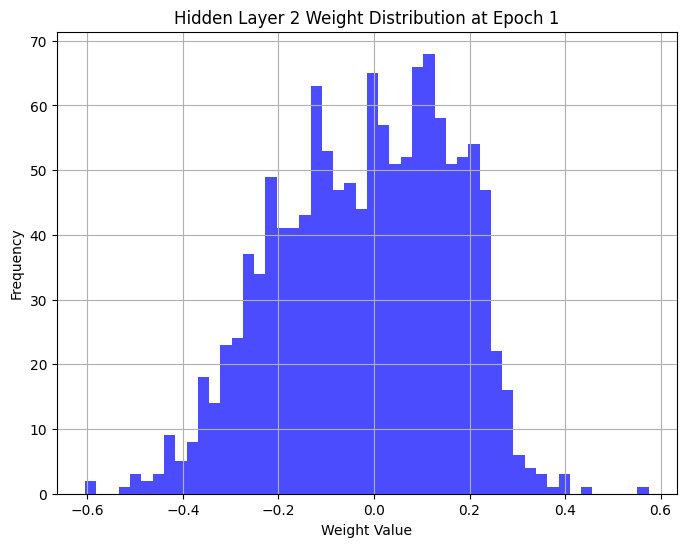

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2649 - accuracy: 0.9252
Epoch 2/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.1128 - accuracy: 0.9668
Epoch 2:


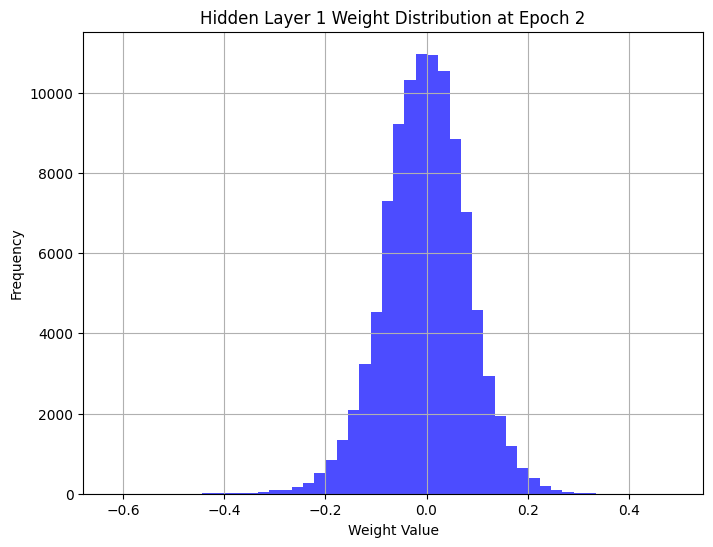

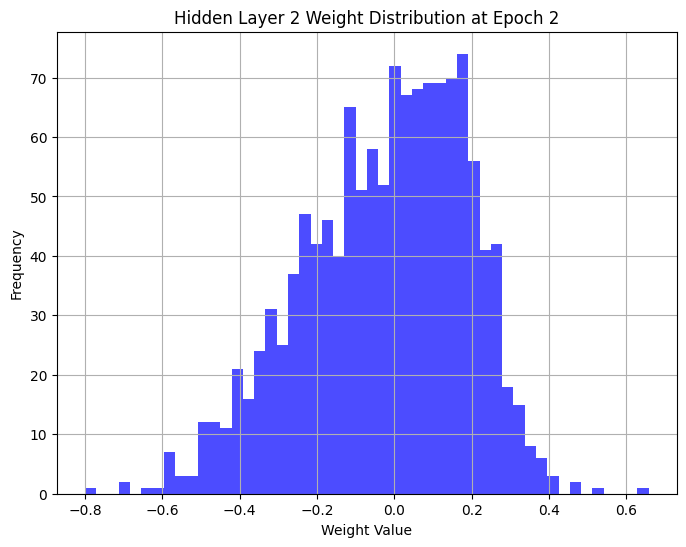

1875/1875 [==============================] - 5s 3ms/step - loss: 0.1129 - accuracy: 0.9667
Epoch 3/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.0777 - accuracy: 0.9761
Epoch 3:


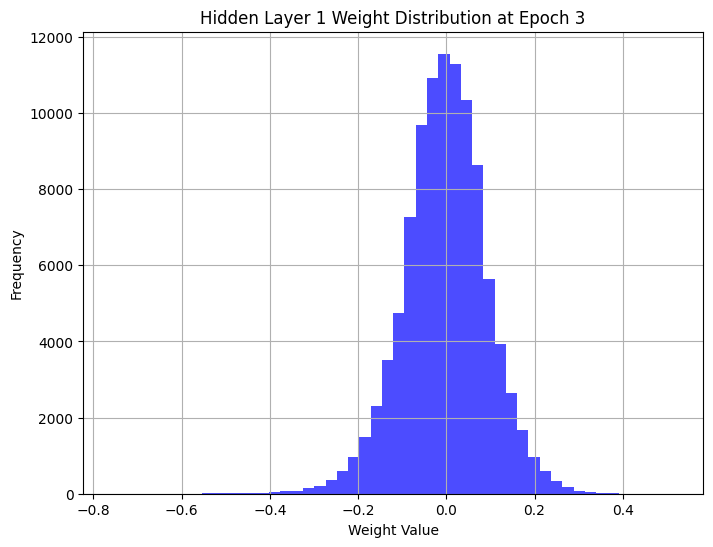

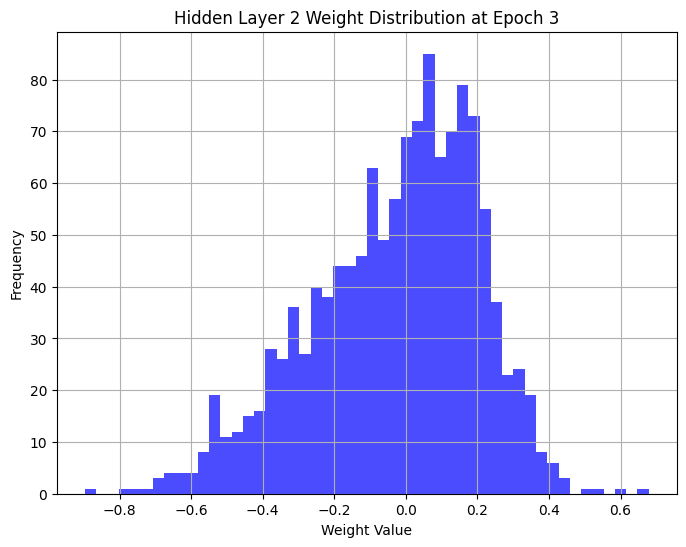

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0778 - accuracy: 0.9760
Epoch 4/10
1856/1875 [============================>.] - ETA: 0s - loss: 0.0592 - accuracy: 0.9823
Epoch 4:


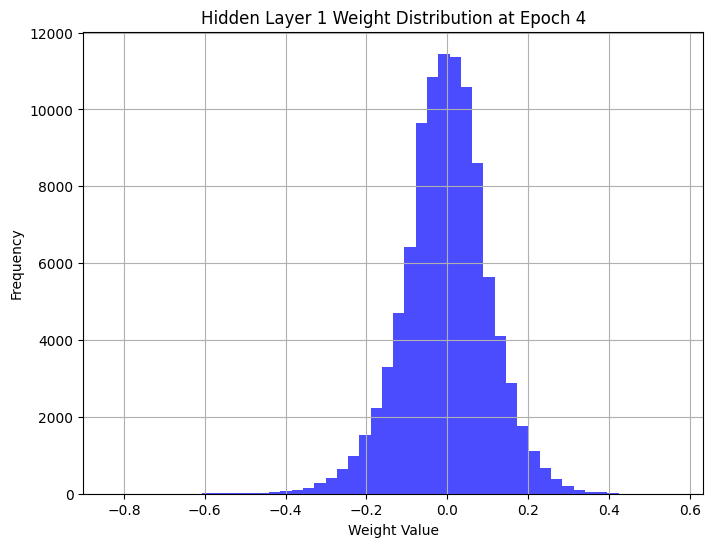

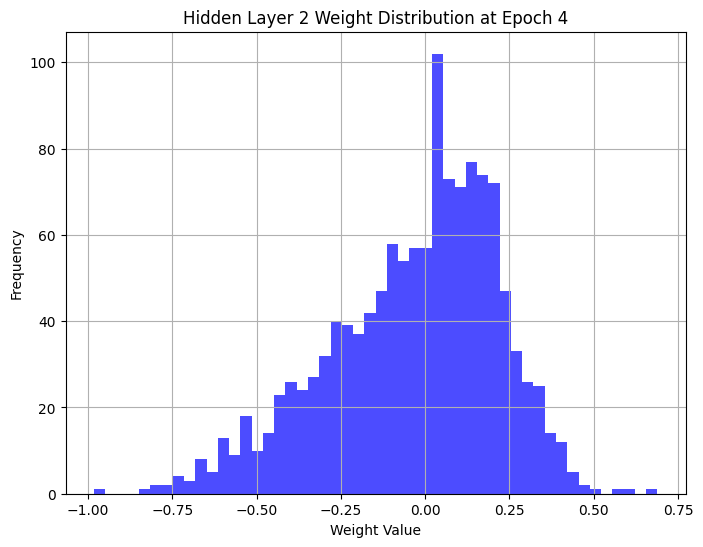

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0591 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0450 - accuracy: 0.9863
Epoch 5:


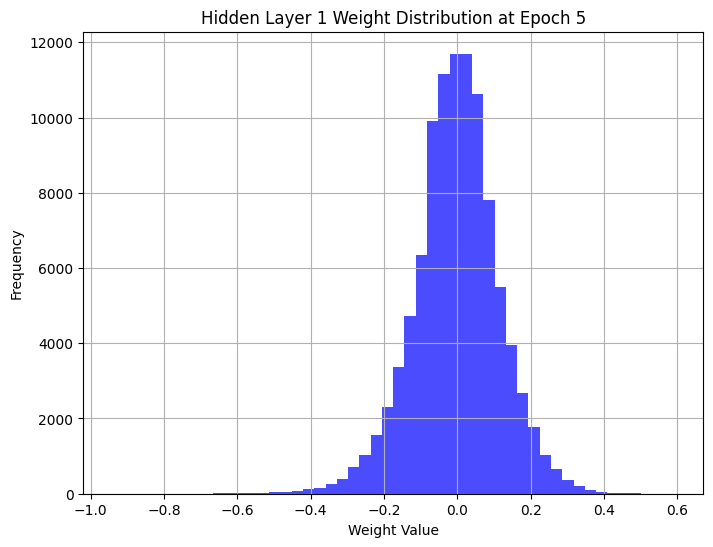

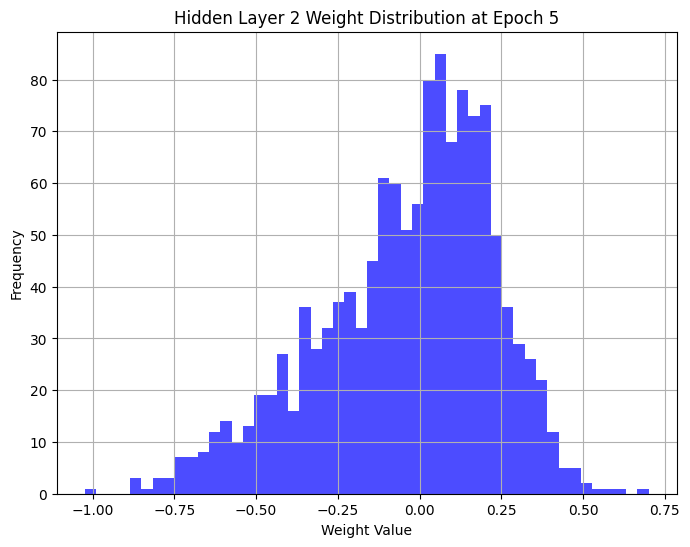

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0450 - accuracy: 0.9863
Epoch 6/10
1860/1875 [============================>.] - ETA: 0s - loss: 0.0354 - accuracy: 0.9888
Epoch 6:


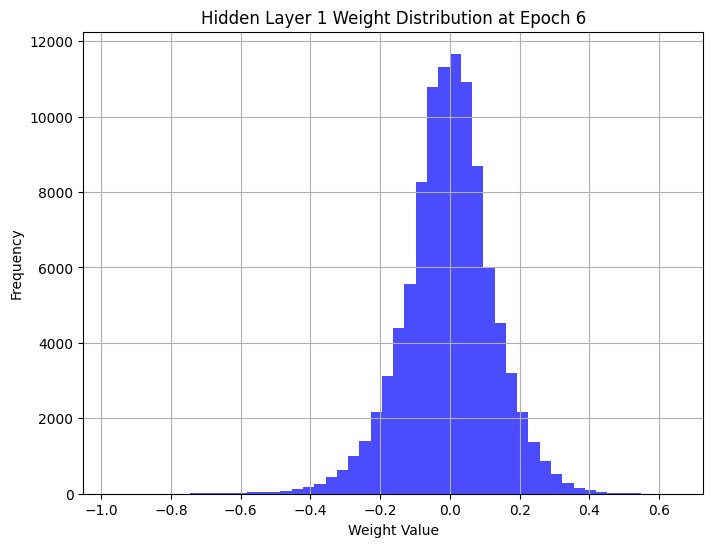

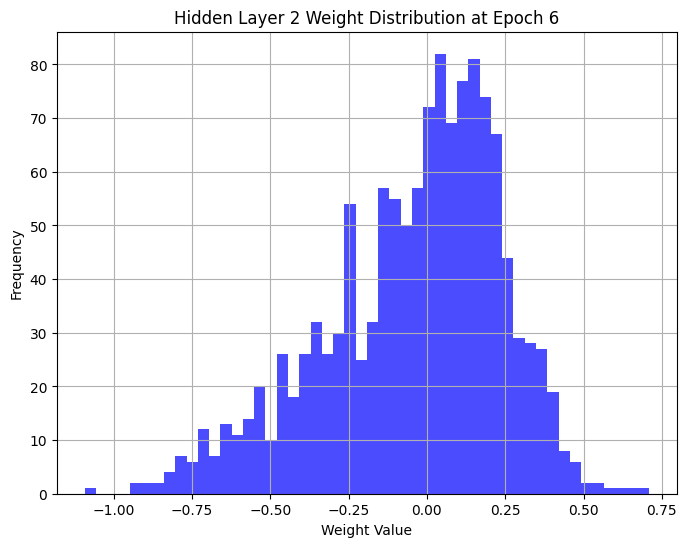

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0358 - accuracy: 0.9887
Epoch 7/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0297 - accuracy: 0.9905
Epoch 7:


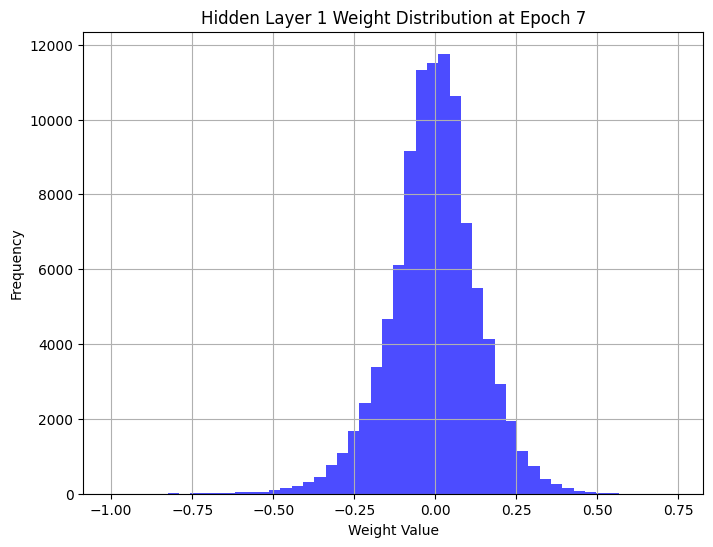

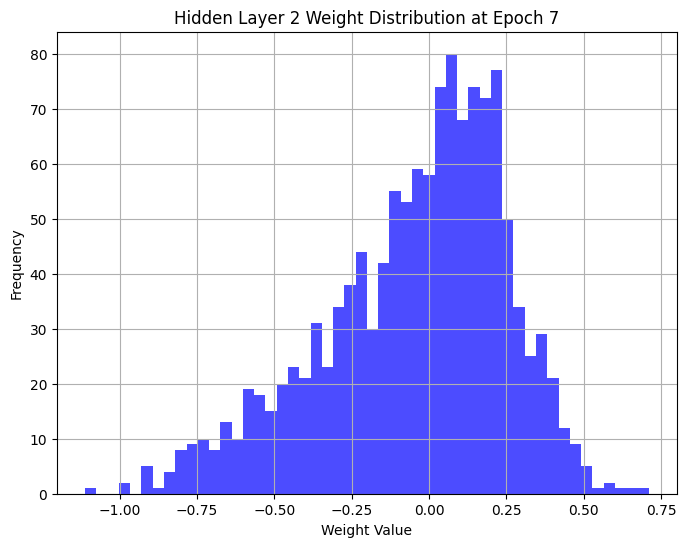

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0297 - accuracy: 0.9905
Epoch 8/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0232 - accuracy: 0.9924
Epoch 8:


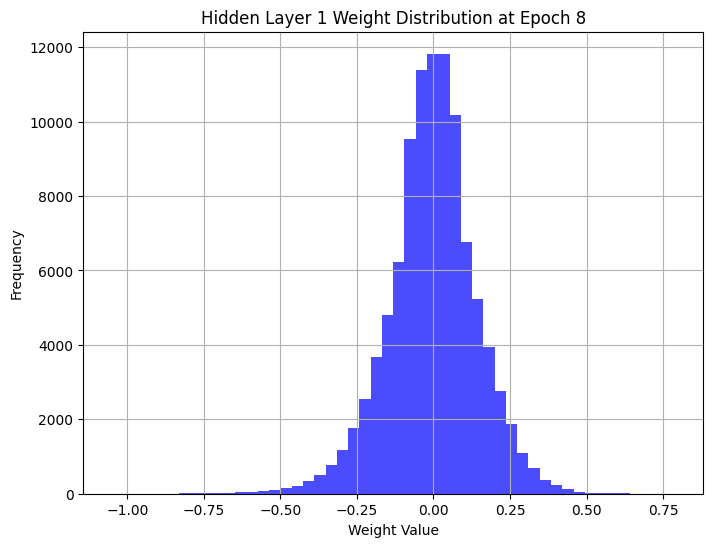

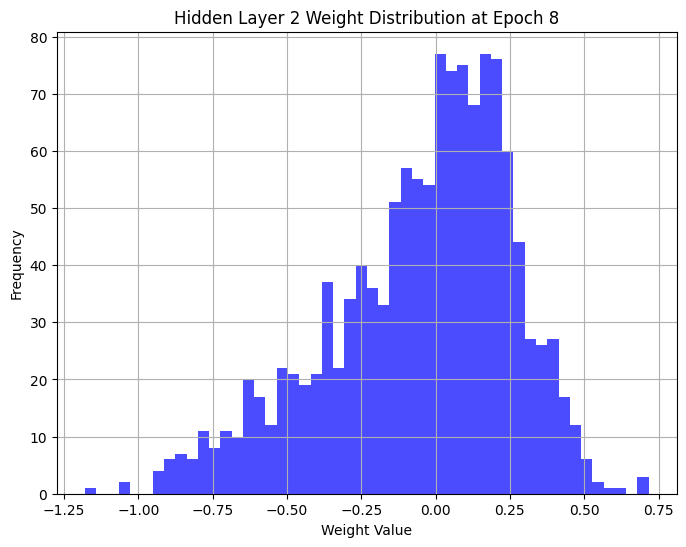

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0232 - accuracy: 0.9924
Epoch 9/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0186 - accuracy: 0.9945
Epoch 9:


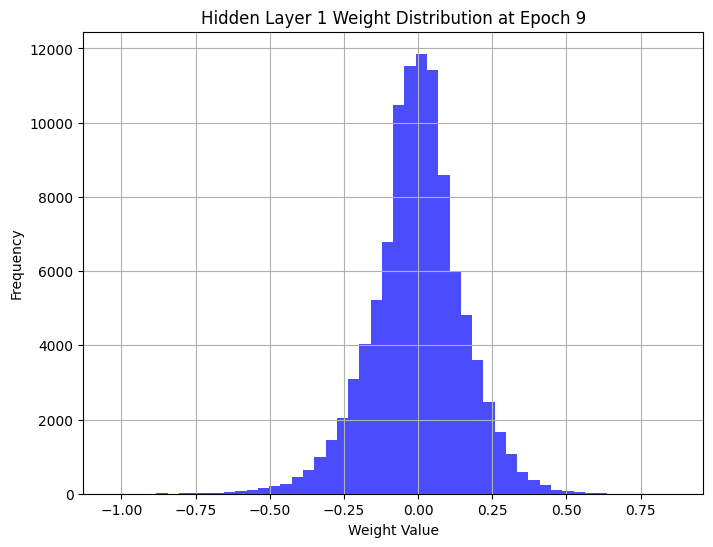

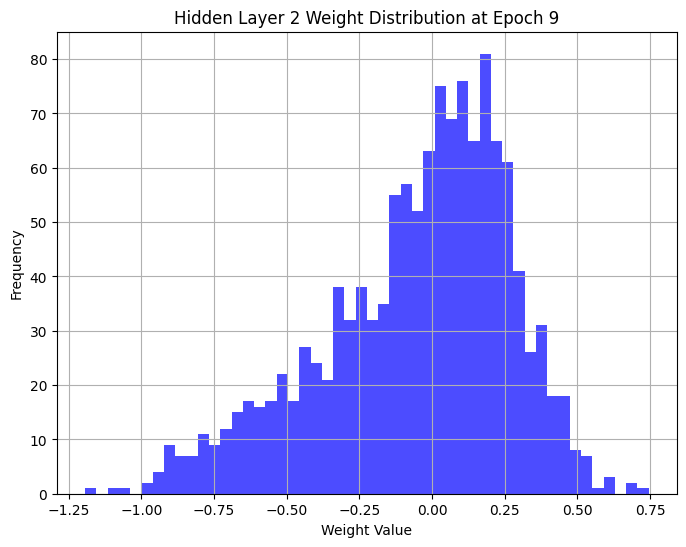

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0186 - accuracy: 0.9945
Epoch 10/10
1863/1875 [============================>.] - ETA: 0s - loss: 0.0159 - accuracy: 0.9949
Epoch 10:


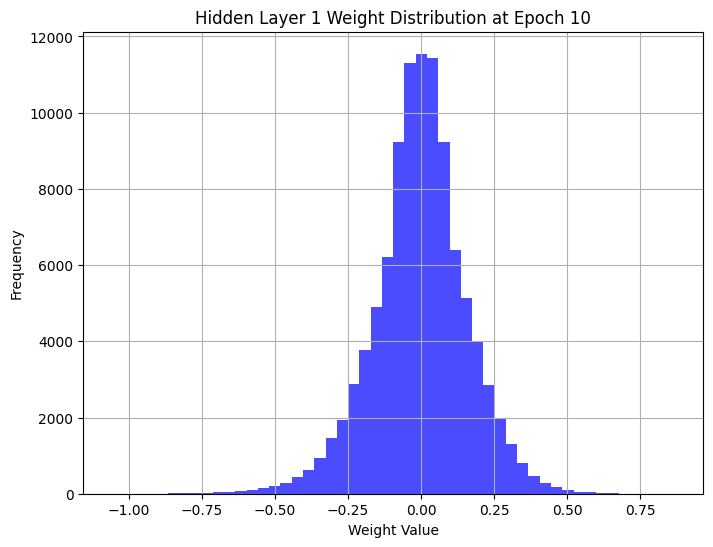

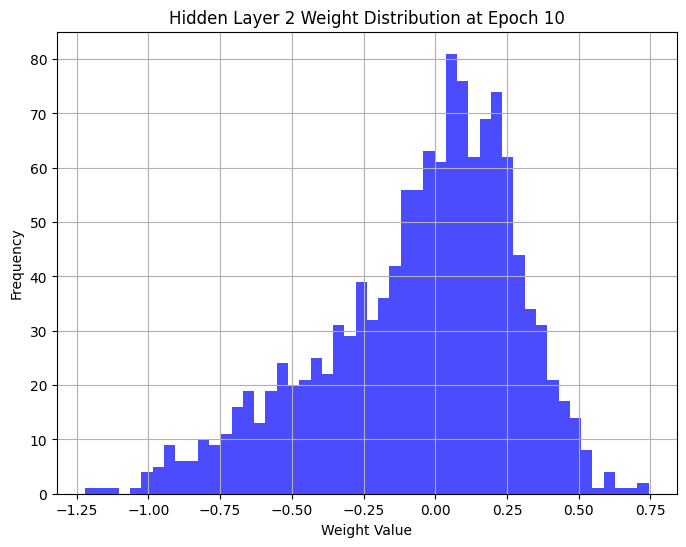

313/313 [==============================] - 1s 2ms/step - loss: 0.0832 - accuracy: 0.9761


[0.08318978548049927, 0.9761000275611877]

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and preprocess data
data = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Custom callback to track weights and plot histograms
class WeightChangeTracker(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch + 1}:")

        # Collect weights for each layer
        for layer_idx, layer in enumerate(self.model.layers):
            layer_weights = layer.get_weights()

            if len(layer_weights) > 0:
                # Flatten the weights (ignoring biases for simplicity)
                flattened_weights = np.concatenate([weights.flatten() for weights in layer_weights])

                # Plot histogram
                plt.figure(figsize=(8, 6))
                plt.hist(flattened_weights, bins=50, color='blue', alpha=0.7)
                plt.title(f'Hidden Layer {layer_idx} Weight Distribution at Epoch {epoch + 1}')
                plt.xlabel('Weight Value')
                plt.ylabel('Frequency')
                plt.grid(True)
                plt.show()

# Fit the model with the custom callback
model.fit(training_images, training_labels, epochs=10, callbacks=[WeightChangeTracker()])

# Evaluate the model
model.evaluate(test_images, test_labels)


Cummulative Distribution Function

Epoch 1/5
1856/1875 [============================>.] - ETA: 0s - loss: 0.2549 - accuracy: 0.9271
Epoch 1:


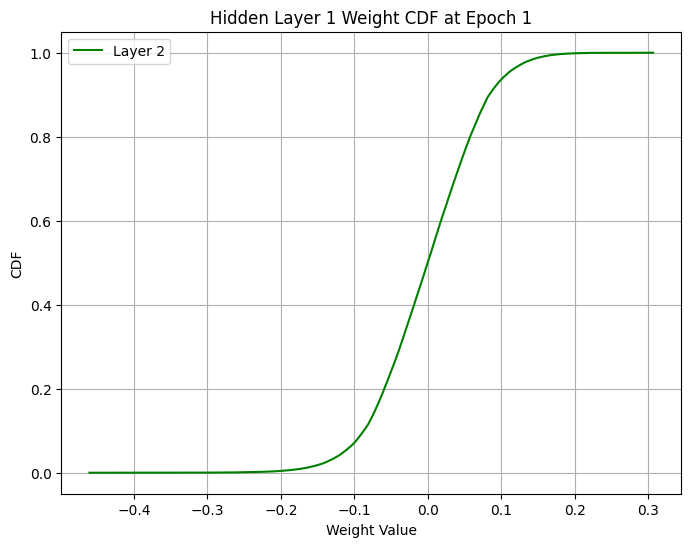

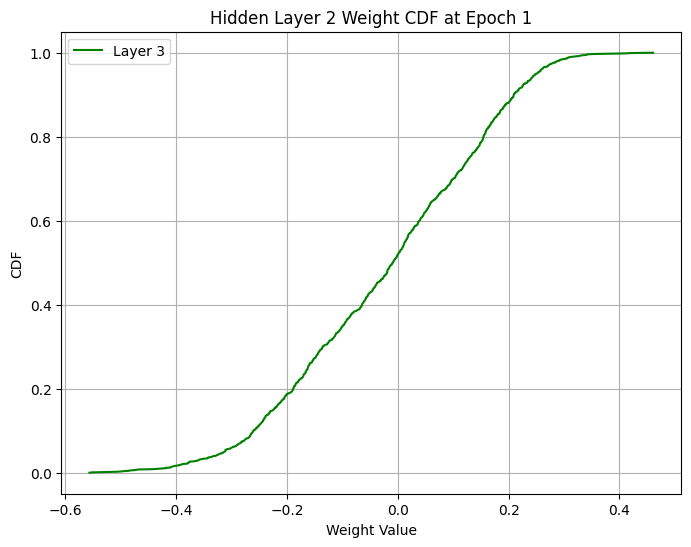

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2535 - accuracy: 0.9273
Epoch 2/5
1871/1875 [============================>.] - ETA: 0s - loss: 0.1094 - accuracy: 0.9671
Epoch 2:


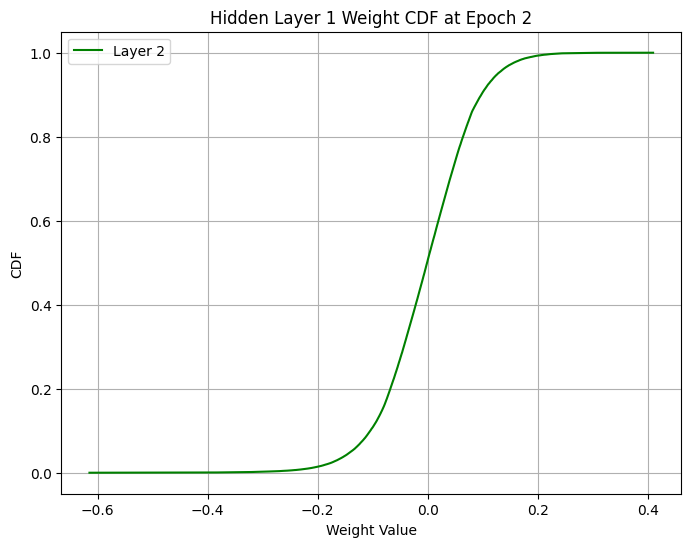

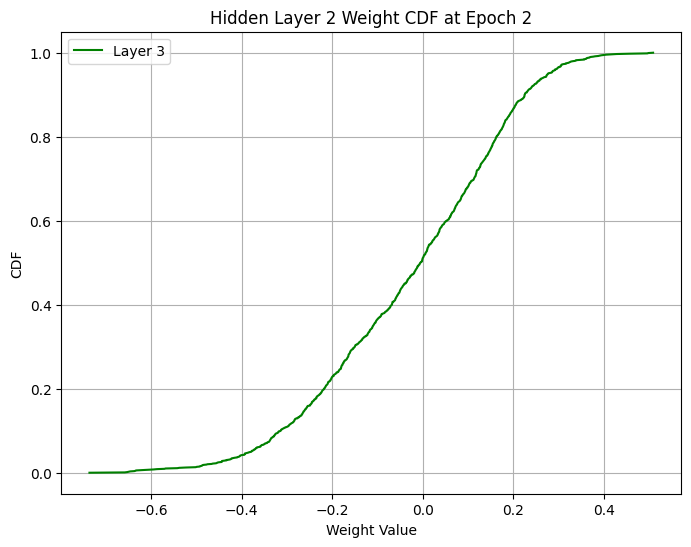

1875/1875 [==============================] - 5s 3ms/step - loss: 0.1093 - accuracy: 0.9671
Epoch 3/5
1866/1875 [============================>.] - ETA: 0s - loss: 0.0752 - accuracy: 0.9772
Epoch 3:


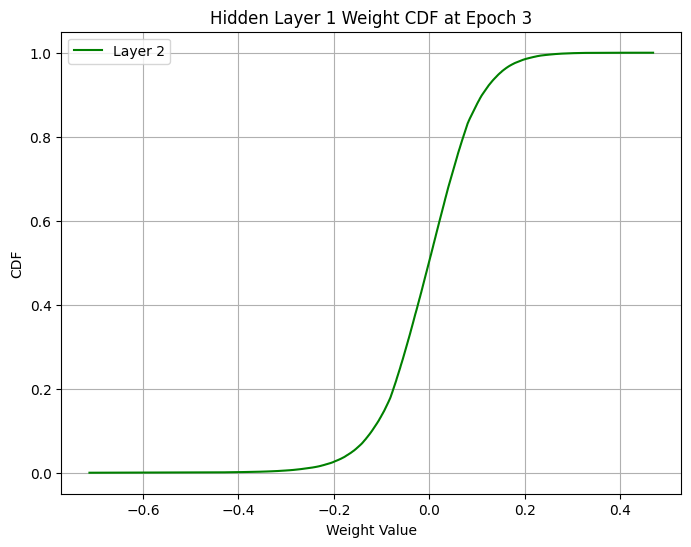

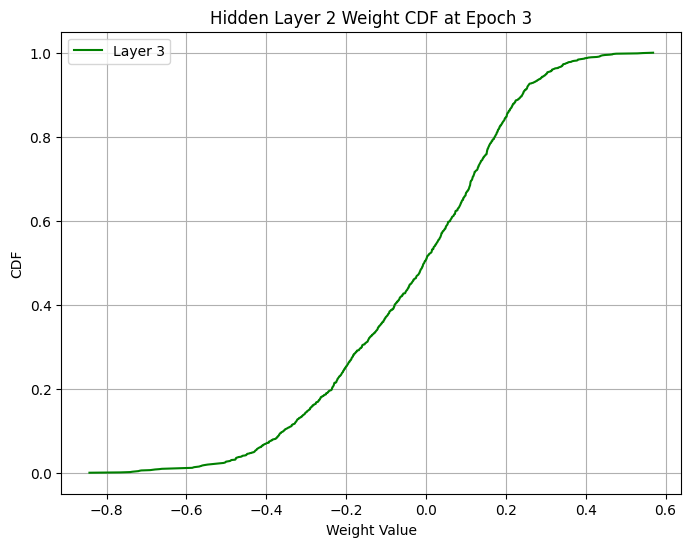

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0750 - accuracy: 0.9773
Epoch 4/5
1871/1875 [============================>.] - ETA: 0s - loss: 0.0567 - accuracy: 0.9819
Epoch 4:


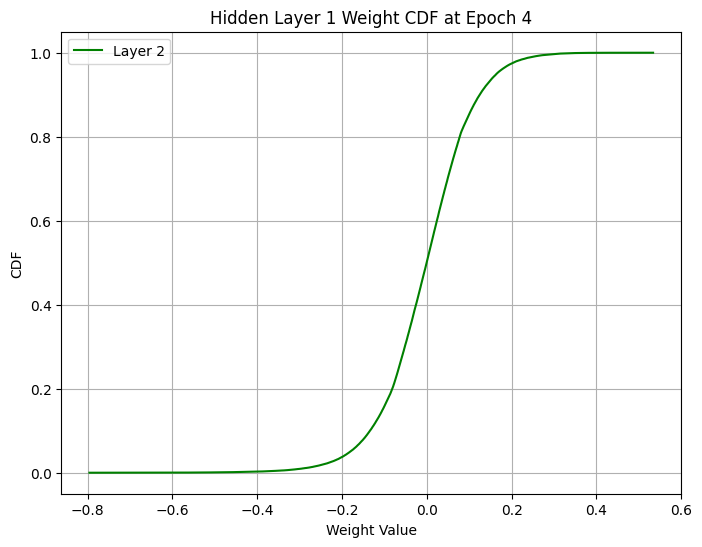

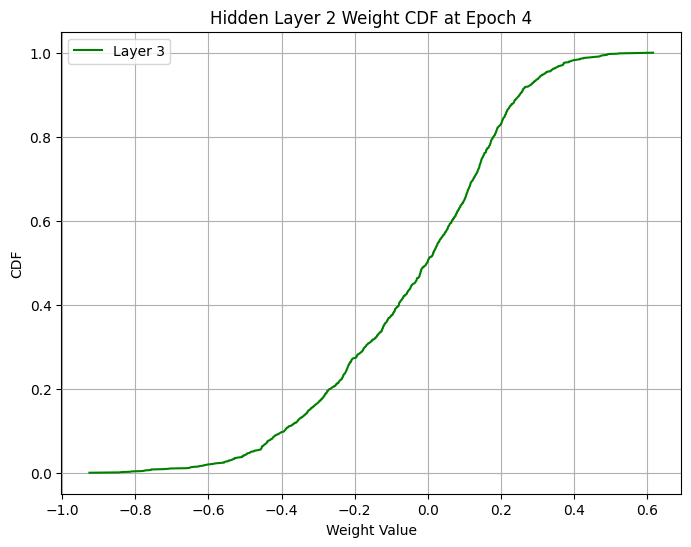

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0568 - accuracy: 0.9819
Epoch 5/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.0429 - accuracy: 0.9865
Epoch 5:


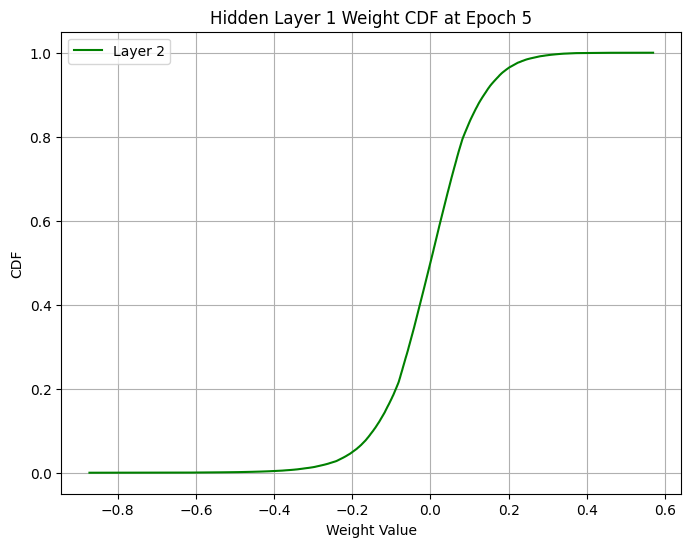

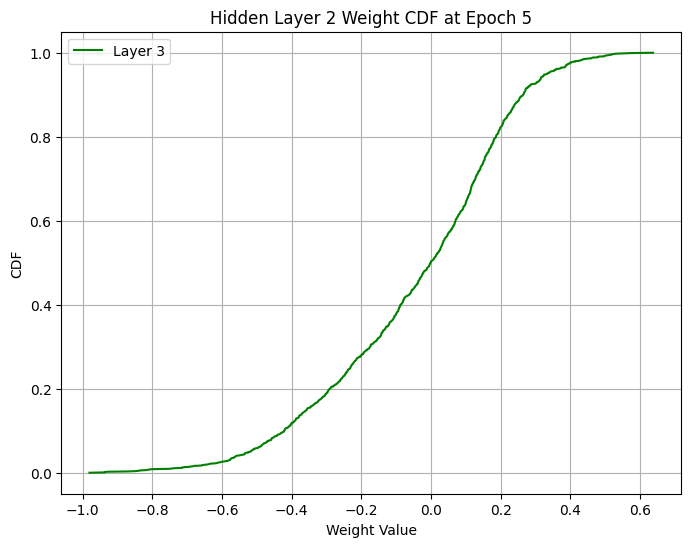

313/313 [==============================] - 1s 2ms/step - loss: 0.0723 - accuracy: 0.9779


[0.07225975394248962, 0.9779000282287598]

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and preprocess data
data = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Custom callback to track weights and plot CDFs
class WeightChangeTracker(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch + 1}:")

        # Collect weights for each layer
        for layer_idx, layer in enumerate(self.model.layers):
            layer_weights = layer.get_weights()

            if len(layer_weights) > 0:
                # Flatten the weights (ignoring biases for simplicity)
                flattened_weights = np.concatenate([weights.flatten() for weights in layer_weights])

                # Sort weights for CDF
                sorted_weights = np.sort(flattened_weights)
                # Generate cumulative distribution values (normalized)
                cdf = np.cumsum(np.ones_like(sorted_weights)) / len(sorted_weights)

                # Plot CDF
                plt.figure(figsize=(8, 6))
                plt.plot(sorted_weights, cdf, color='green', label=f'Layer {layer_idx + 1}')
                plt.title(f'Hidden Layer {layer_idx} Weight CDF at Epoch {epoch + 1}')
                plt.xlabel('Weight Value')
                plt.ylabel('CDF')
                plt.grid(True)
                plt.legend()
                plt.show()

# Fit the model with the custom callback
model.fit(training_images, training_labels, epochs=5, callbacks=[WeightChangeTracker()])

# Evaluate the model
model.evaluate(test_images, test_labels)


# Discard > 90 %
# retain <= 90 %

Epoch 1/5
1871/1875 [============================>.] - ETA: 0s - loss: 0.2605 - accuracy: 0.9254
Epoch 1:


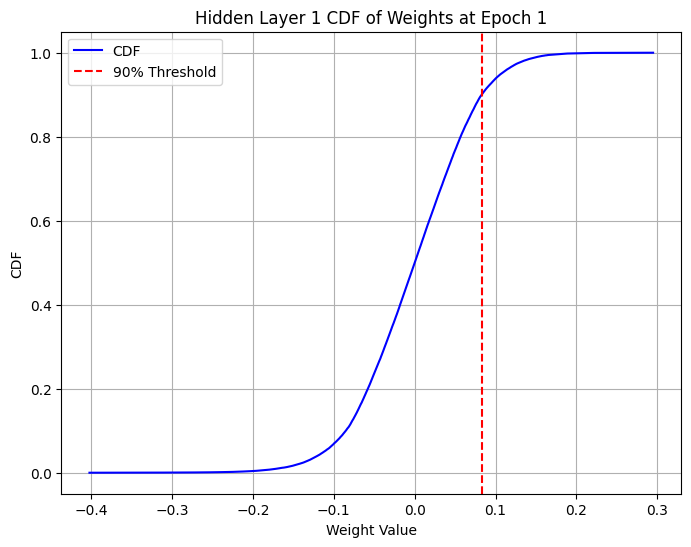

Layer 2: Retained 90432 weights out of 100480


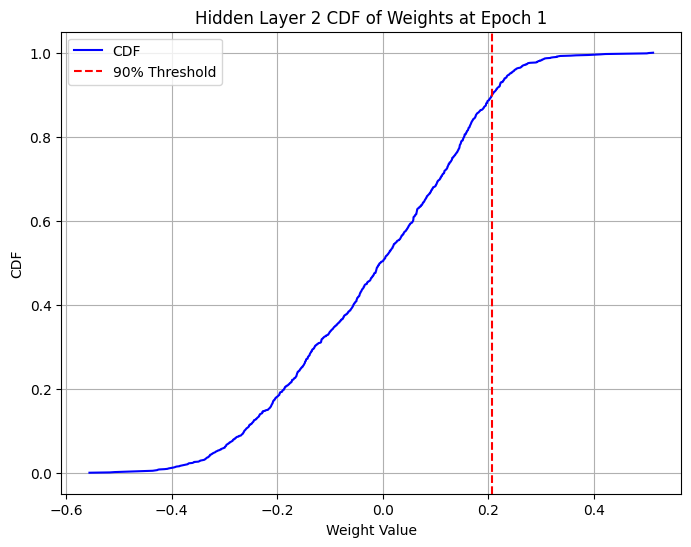

Layer 3: Retained 1161 weights out of 1290
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2602 - accuracy: 0.9255
Epoch 2/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.1126 - accuracy: 0.9670
Epoch 2:


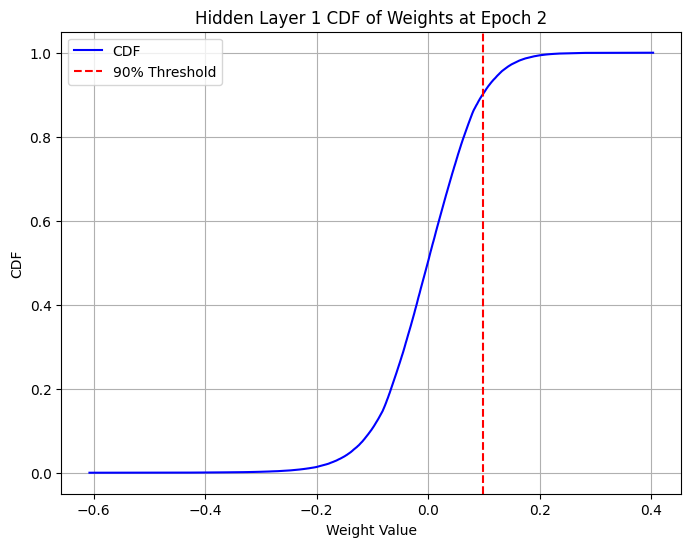

Layer 2: Retained 90432 weights out of 100480


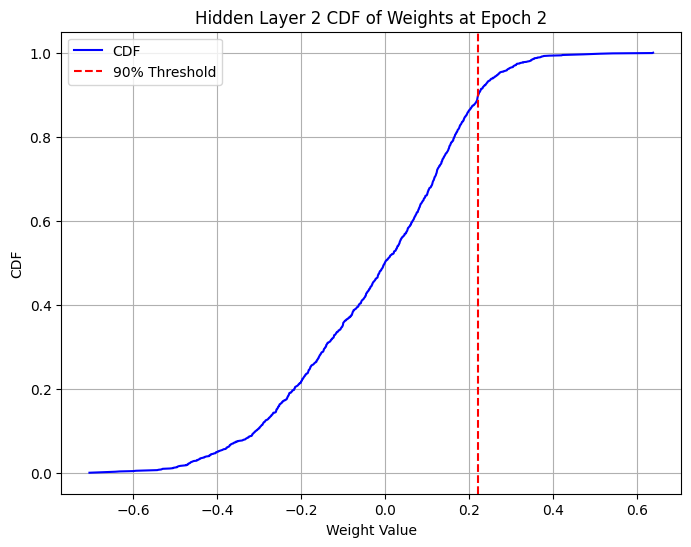

Layer 3: Retained 1161 weights out of 1290
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1126 - accuracy: 0.9670
Epoch 3/5
1866/1875 [============================>.] - ETA: 0s - loss: 0.0769 - accuracy: 0.9768
Epoch 3:


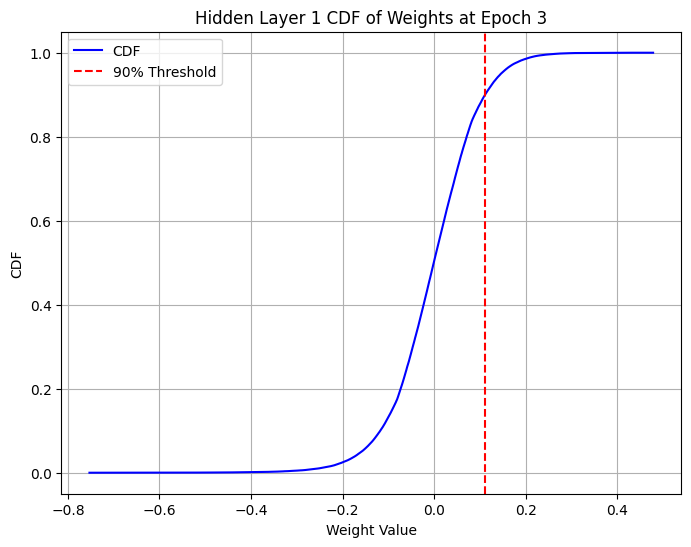

Layer 2: Retained 90432 weights out of 100480


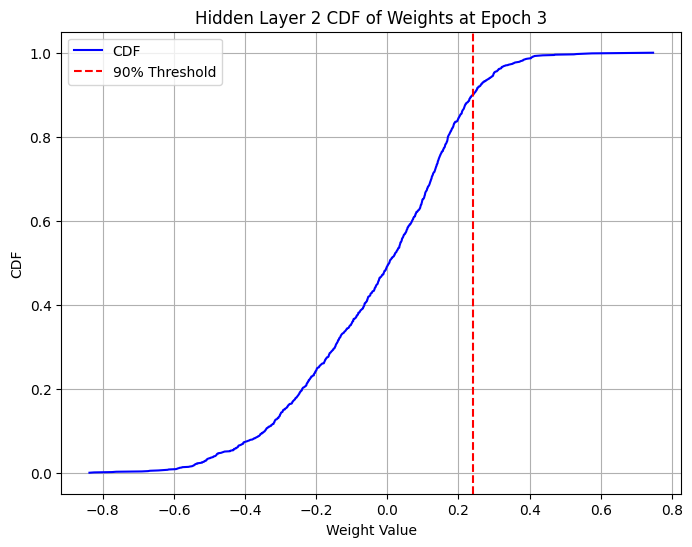

Layer 3: Retained 1161 weights out of 1290
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0769 - accuracy: 0.9768
Epoch 4/5
1856/1875 [============================>.] - ETA: 0s - loss: 0.0580 - accuracy: 0.9822
Epoch 4:


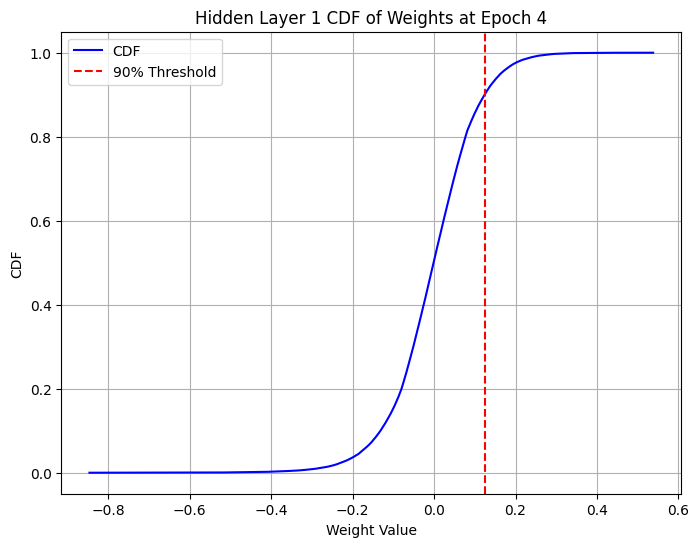

Layer 2: Retained 90432 weights out of 100480


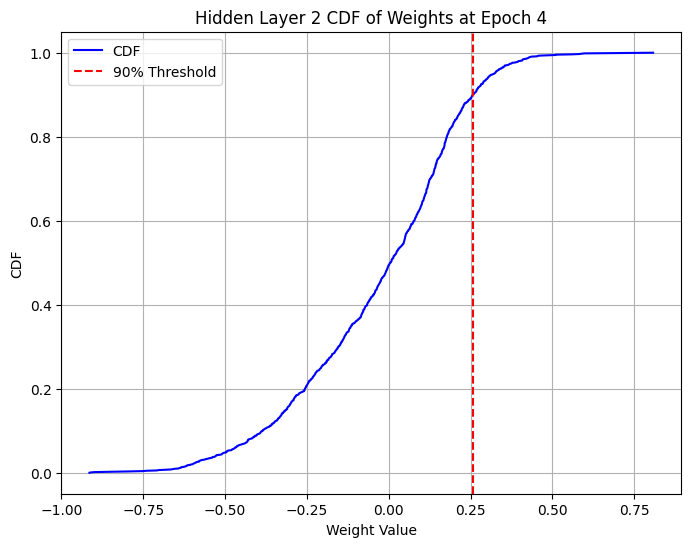

Layer 3: Retained 1161 weights out of 1290
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0580 - accuracy: 0.9822
Epoch 5/5
1858/1875 [============================>.] - ETA: 0s - loss: 0.0445 - accuracy: 0.9863
Epoch 5:


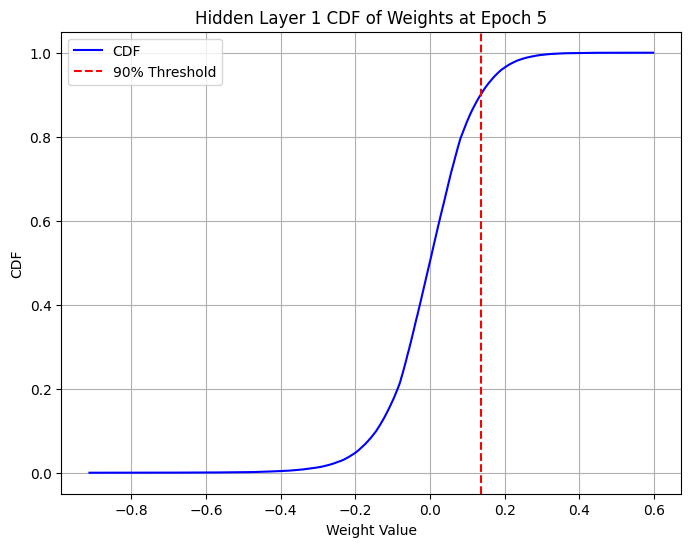

Layer 2: Retained 90432 weights out of 100480


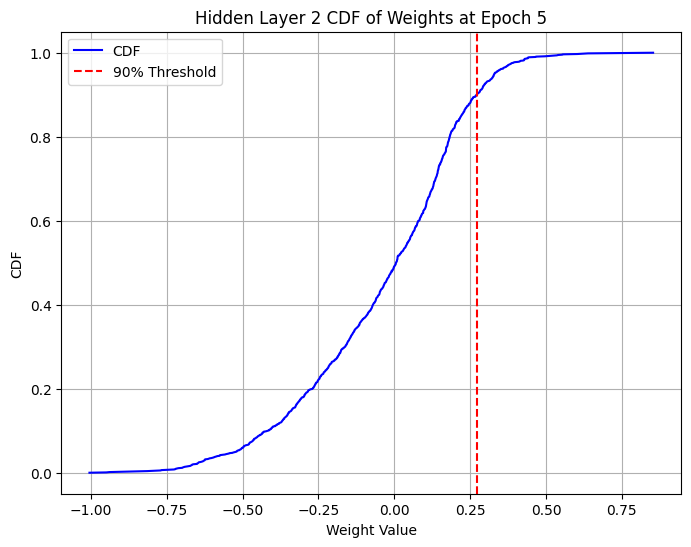

Layer 3: Retained 1161 weights out of 1290
313/313 [==============================] - 1s 2ms/step - loss: 0.0804 - accuracy: 0.9753


[0.08044560998678207, 0.9753000140190125]

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and preprocess data
data = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Custom callback to track weights, plot CDF, and retain weights <= 90% percentile
class WeightChangeTracker(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch + 1}:")

        # Collect weights for each layer
        for layer_idx, layer in enumerate(self.model.layers):
            layer_weights = layer.get_weights()

            if len(layer_weights) > 0:
                # Flatten the weights (ignoring biases for simplicity)
                flattened_weights = np.concatenate([weights.flatten() for weights in layer_weights])

                # Sort the weights for CDF calculation
                sorted_weights = np.sort(flattened_weights)

                # Calculate the cumulative distribution (CDF)
                cdf = np.arange(1, len(sorted_weights) + 1) / len(sorted_weights)

                # Find the 90th percentile threshold
                threshold_90 = np.percentile(sorted_weights, 90)

                # Plot CDF
                plt.figure(figsize=(8, 6))
                plt.plot(sorted_weights, cdf, label="CDF", color="blue")
                plt.axvline(x=threshold_90, color='red', linestyle='--', label="90% Threshold")
                plt.title(f'Hidden Layer {layer_idx} CDF of Weights at Epoch {epoch + 1}')
                plt.xlabel('Weight Value')
                plt.ylabel('CDF')
                plt.grid(True)
                plt.legend()
                plt.show()

                # Retain weights <= 90th percentile
                retained_weights = flattened_weights[flattened_weights <= threshold_90]
                print(f'Layer {layer_idx + 1}: Retained {len(retained_weights)} weights out of {len(flattened_weights)}')

                # Optionally, update the weights to retain only those <= 90th percentile (not done in practice)
                # Uncomment if you want to update the model's weights, which will reduce its capacity
                # mask = flattened_weights <= threshold_90
                # updated_weights = np.where(mask, flattened_weights, 0)  # Set discarded weights to zero

                # Here, you can reconstruct and assign the updated weights back to the model if desired
                # ...

# Fit the model with the custom callback
model.fit(training_images, training_labels, epochs=5, callbacks=[WeightChangeTracker()])

# Evaluate the model
model.evaluate(test_images, test_labels)


# make new model with this retained weights

Epoch 1/10
1860/1875 [============================>.] - ETA: 0s - loss: 0.2577 - accuracy: 0.9257
Epoch 1:


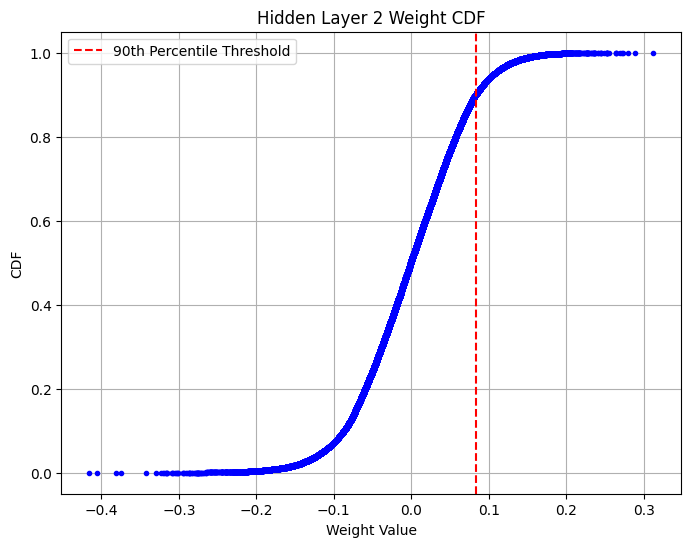

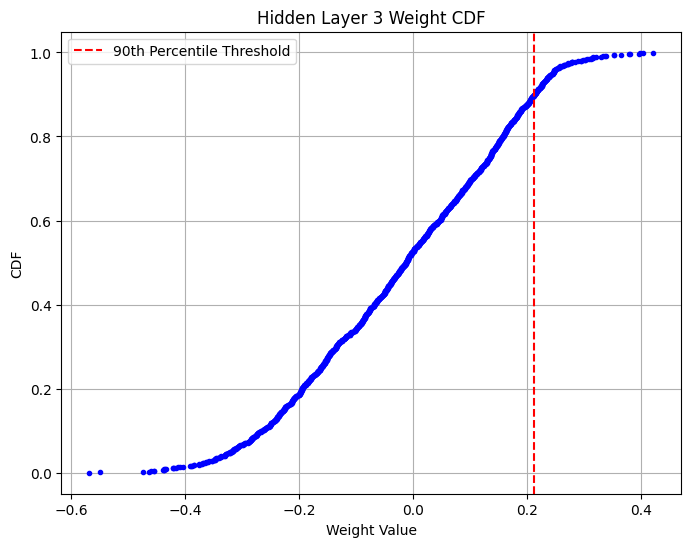

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2570 - accuracy: 0.9259
Epoch 2/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.1130 - accuracy: 0.9672
Epoch 2:


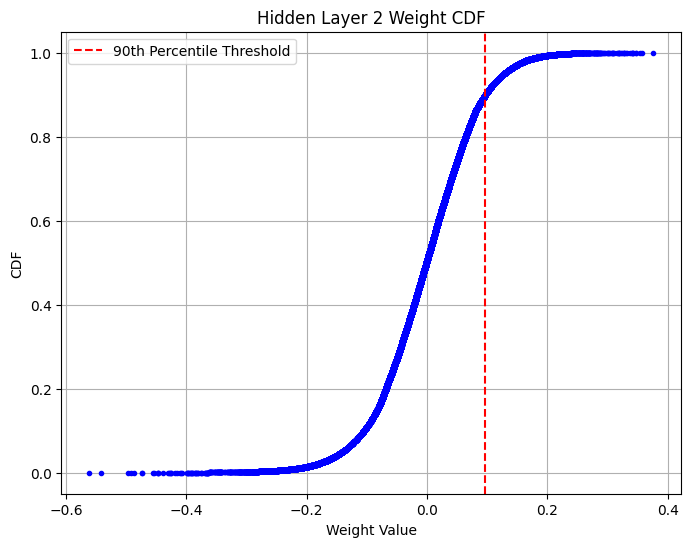

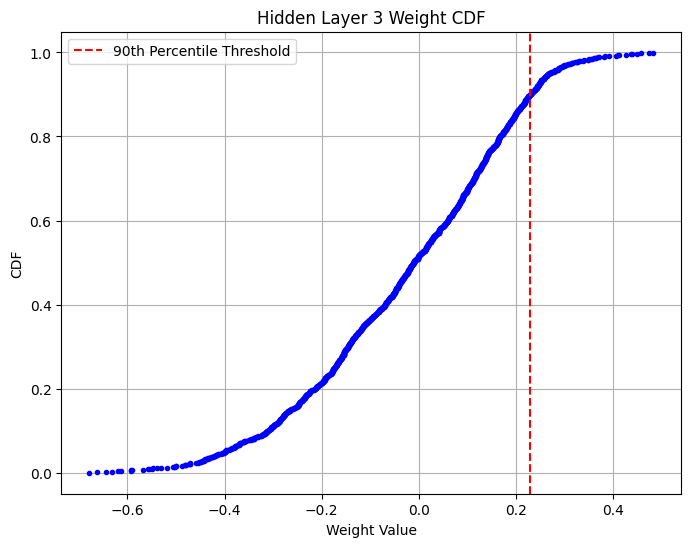

1875/1875 [==============================] - 5s 3ms/step - loss: 0.1131 - accuracy: 0.9672
Epoch 3/10
1856/1875 [============================>.] - ETA: 0s - loss: 0.0786 - accuracy: 0.9765
Epoch 3:


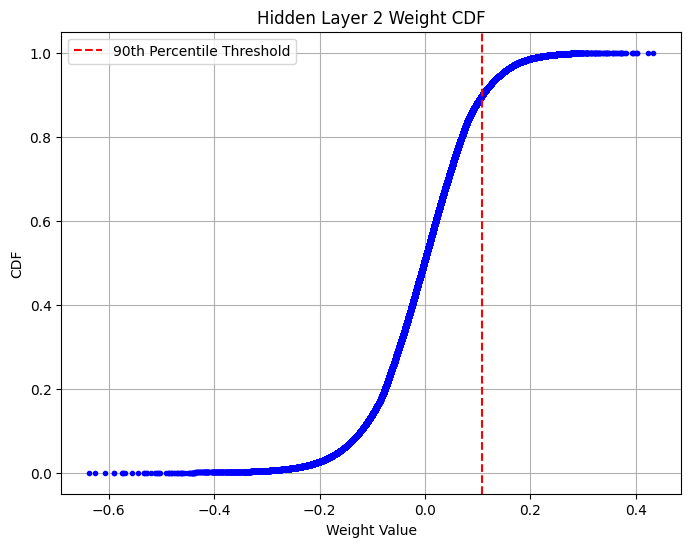

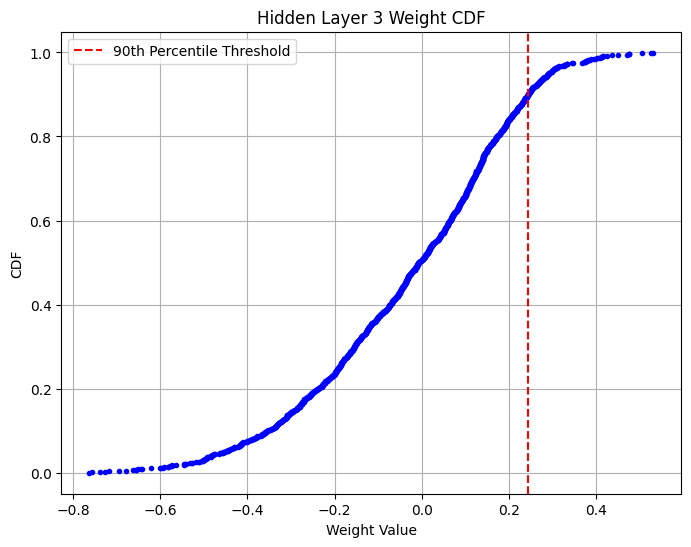

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0786 - accuracy: 0.9765
Epoch 4/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.0594 - accuracy: 0.9816
Epoch 4:


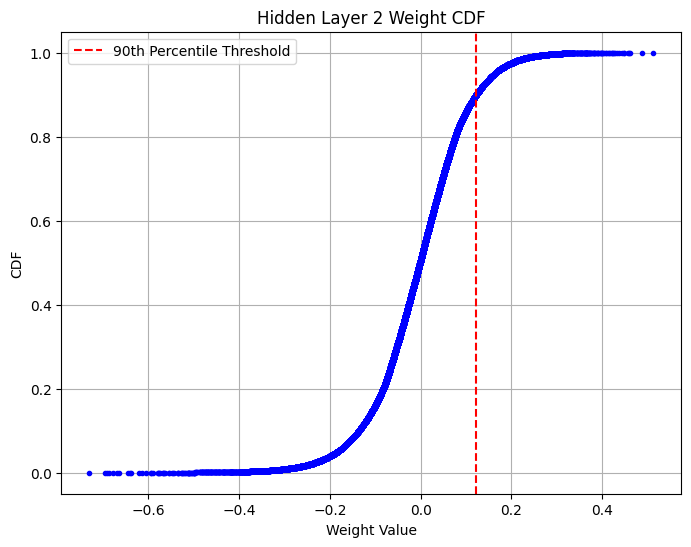

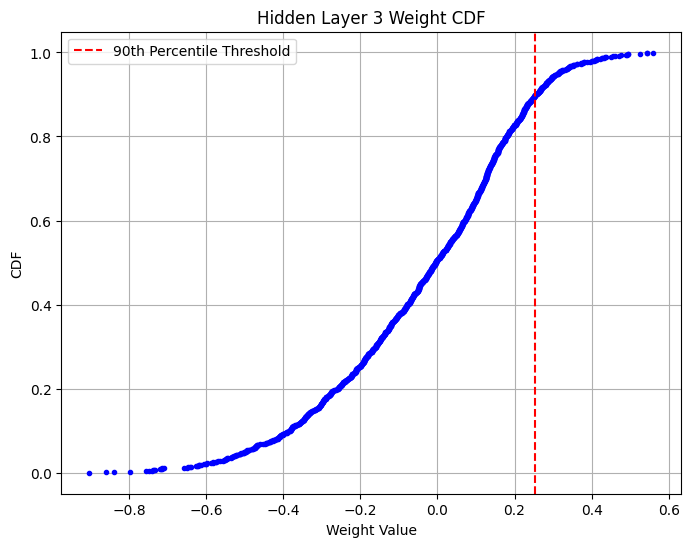

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0595 - accuracy: 0.9816
Epoch 5/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.0449 - accuracy: 0.9861
Epoch 5:


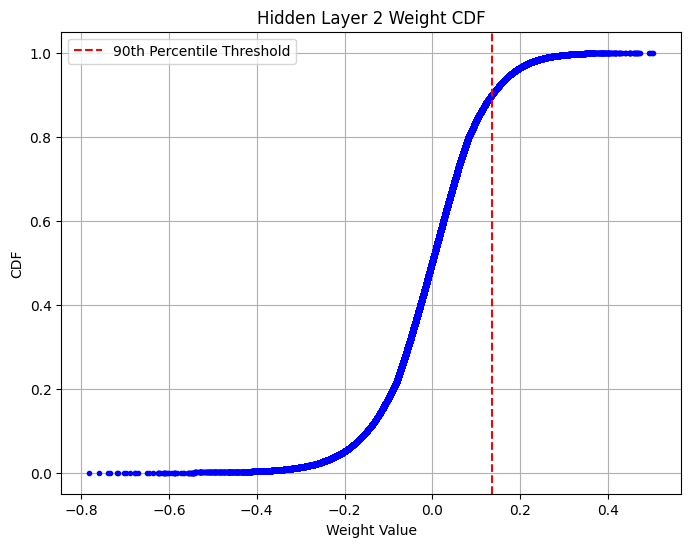

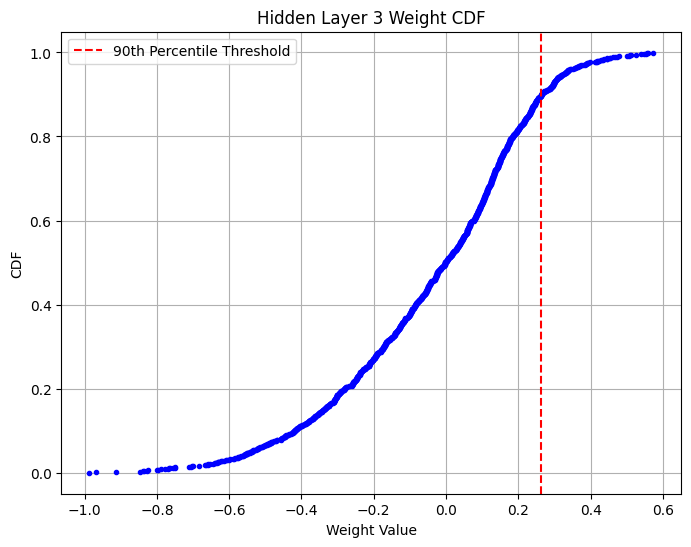

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0450 - accuracy: 0.9861
Epoch 6/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0355 - accuracy: 0.9894
Epoch 6:


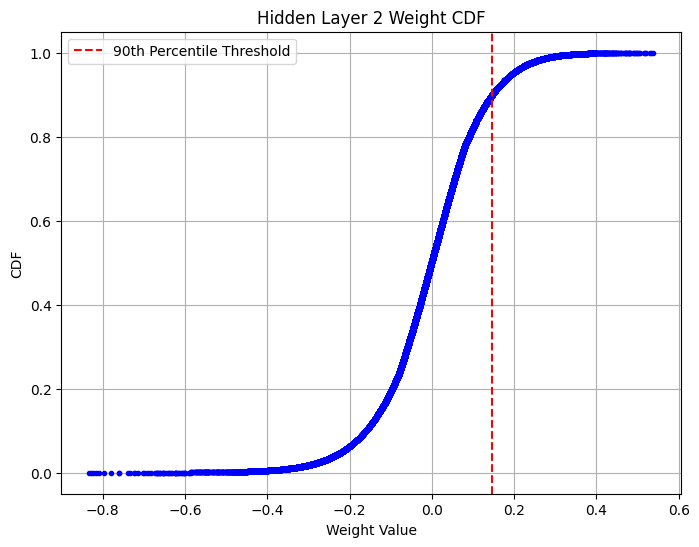

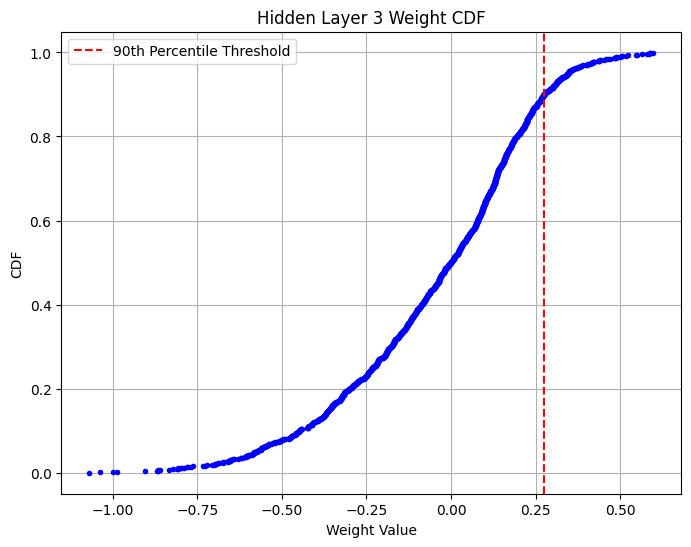

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0355 - accuracy: 0.9894
Epoch 7/10
1857/1875 [============================>.] - ETA: 0s - loss: 0.0295 - accuracy: 0.9908
Epoch 7:


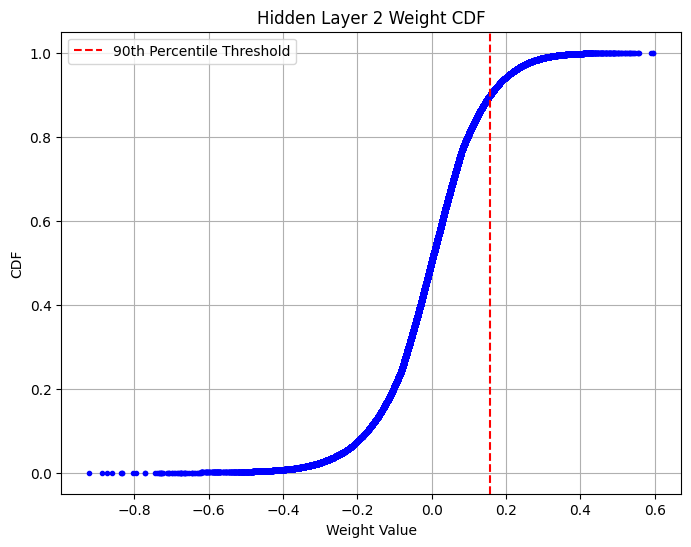

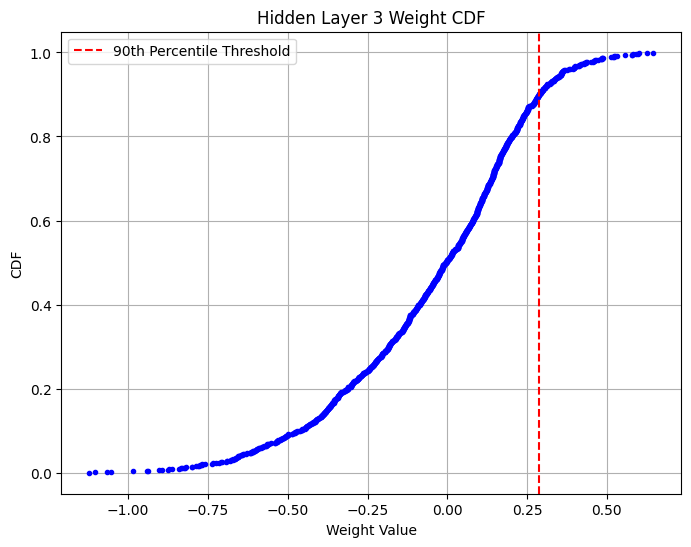

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0295 - accuracy: 0.9908
Epoch 8/10
1859/1875 [============================>.] - ETA: 0s - loss: 0.0241 - accuracy: 0.9924
Epoch 8:


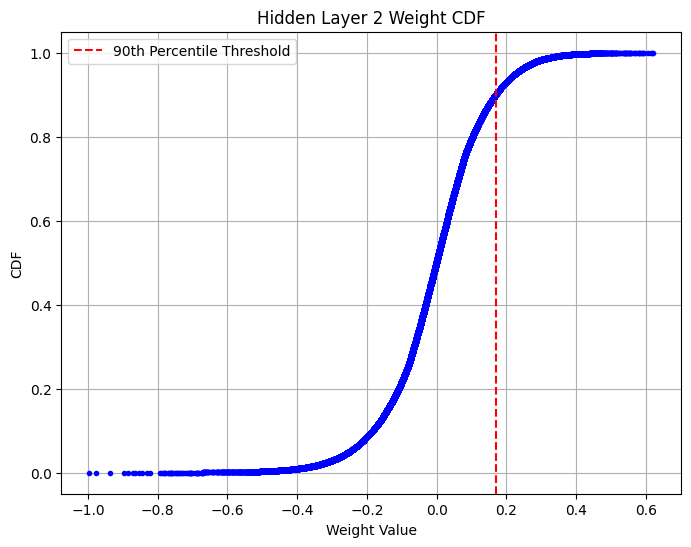

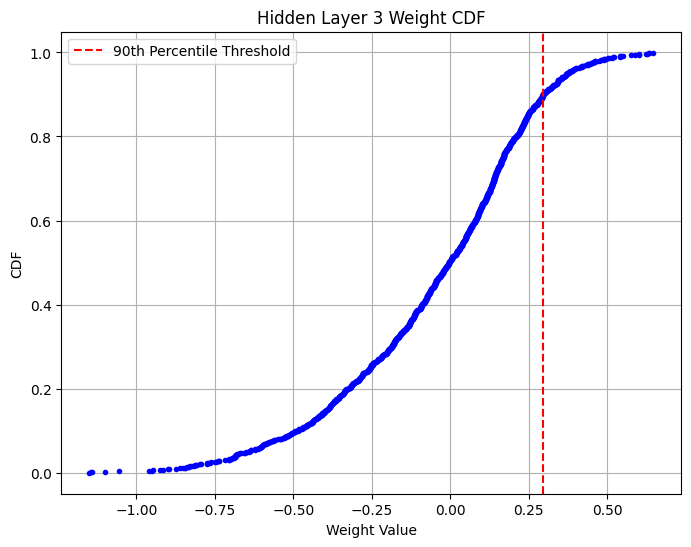

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0242 - accuracy: 0.9924
Epoch 9/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.0196 - accuracy: 0.9940
Epoch 9:


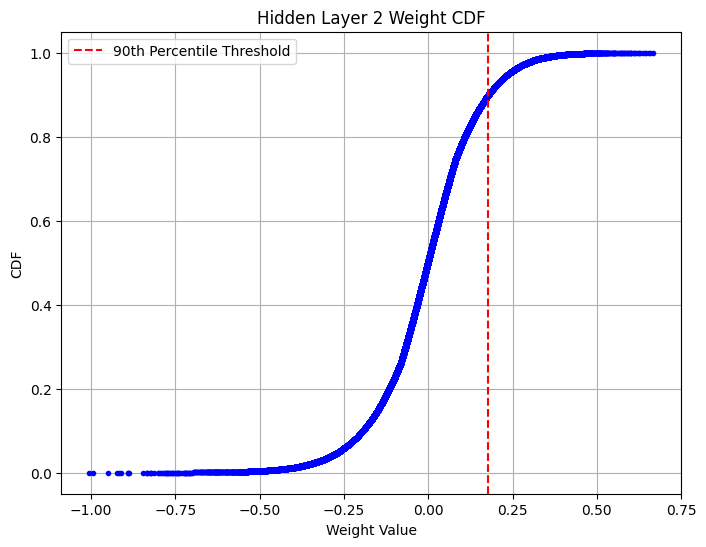

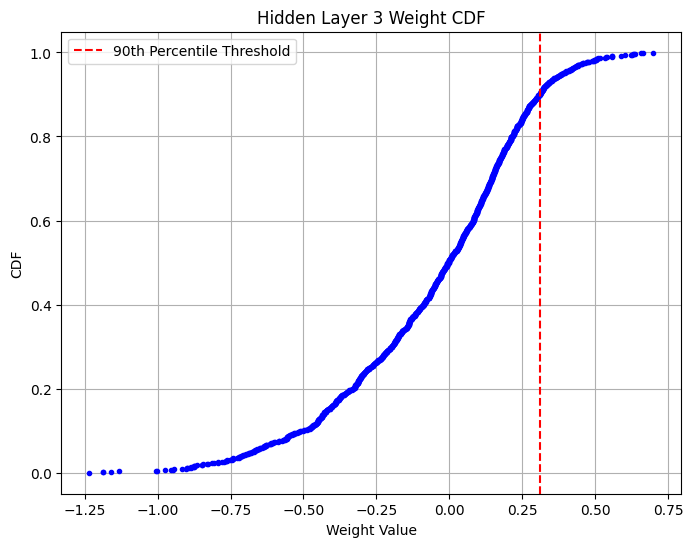

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0197 - accuracy: 0.9940
Epoch 10/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.0163 - accuracy: 0.9949
Epoch 10:


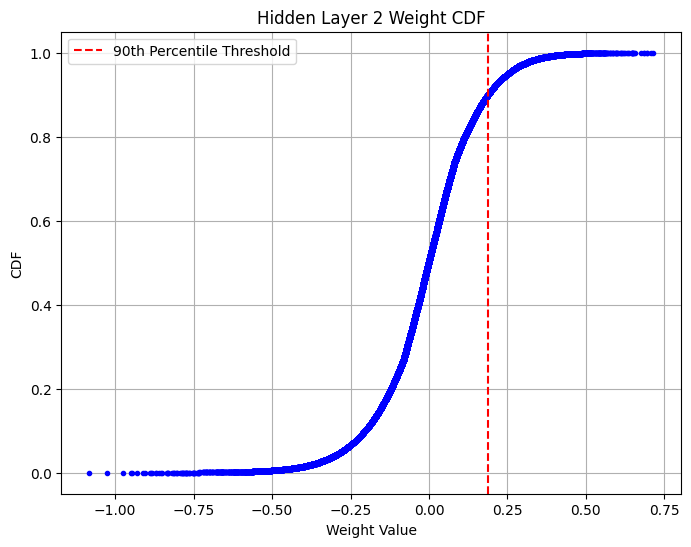

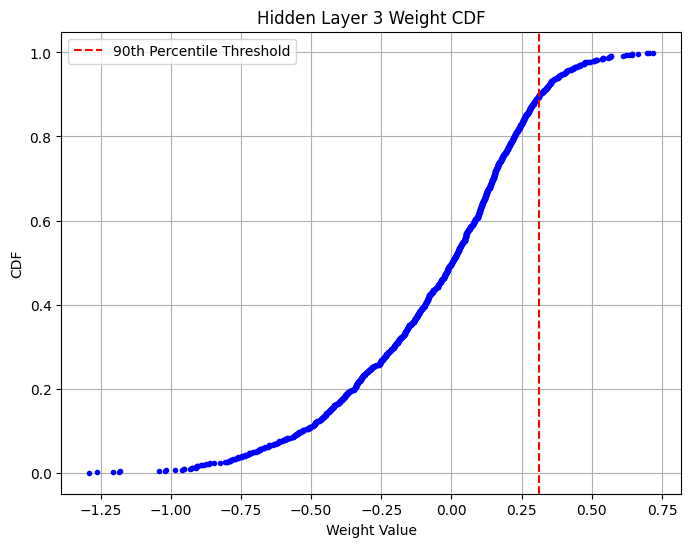

313/313 [==============================] - 1s 2ms/step - loss: 0.0789 - accuracy: 0.9779
Old Model Test Loss: 0.07887546718120575
Old Model Test Accuracy: 0.9779000282287598
313/313 [==============================] - 1s 2ms/step - loss: 0.9840 - accuracy: 0.6902
New Model Test Loss: 0.983966588973999
New Model Test Accuracy: 0.6901999711990356


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and preprocess data
data = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu", name='hidden_layer1'),
    keras.layers.Dense(10, activation="softmax", name='output_layer')
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Custom callback to track weights and plot CDF
class WeightChangeTracker(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch + 1}:")

        for layer_idx, layer in enumerate(self.model.layers):
            layer_weights = layer.get_weights()

            if len(layer_weights) > 0:
                flattened_weights = np.concatenate([weights.flatten() for weights in layer_weights])

                # Plot CDF
                sorted_weights = np.sort(flattened_weights)
                cdf = np.arange(len(sorted_weights)) / float(len(sorted_weights))

                plt.figure(figsize=(8, 6))
                plt.plot(sorted_weights, cdf, color='blue', marker='.', linestyle='none')

                # Add a threshold line at the 90th percentile
                threshold = np.percentile(flattened_weights, 90)
                plt.axvline(x=threshold, color='red', linestyle='--', label='90th Percentile Threshold')

                plt.title(f'Hidden Layer {layer_idx + 1} Weight CDF')
                plt.xlabel('Weight Value')
                plt.ylabel('CDF')
                plt.legend()
                plt.grid(True)
                plt.show()

# Function to create a new model with modified weights
def create_model_with_reduced_weights(original_model):
    new_model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu", name='hidden_layer1'),
        keras.layers.Dense(10, activation="softmax", name='output_layer')
    ])

    for original_layer, new_layer in zip(original_model.layers, new_model.layers):
        if len(original_layer.get_weights()) > 0:
            weights = original_layer.get_weights()
            threshold = np.percentile(weights[0].flatten(), 90)
            weights[0][weights[0] > threshold] = 0

            new_layer.set_weights(weights)

    new_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return new_model

# Train the original model with the custom callback
model.fit(training_images, training_labels, epochs=10, callbacks=[WeightChangeTracker()])

# Evaluate the original model
old_test_loss, old_test_accuracy = model.evaluate(test_images, test_labels)
print(f"Old Model Test Loss: {old_test_loss}")
print(f"Old Model Test Accuracy: {old_test_accuracy}")

# Create the new model with reduced weights
new_model = create_model_with_reduced_weights(model)

# Evaluate the new model
new_test_loss, new_test_accuracy = new_model.evaluate(test_images, test_labels)
print(f"New Model Test Loss: {new_test_loss}")
print(f"New Model Test Accuracy: {new_test_accuracy}")


# now find number of times each weight is updated and plot an update plot
# weight id | number of updates

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2557 - accuracy: 0.9272
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1132 - accuracy: 0.9657
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0768 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0569 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0450 - accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0350 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0282 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0231 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0188 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.015

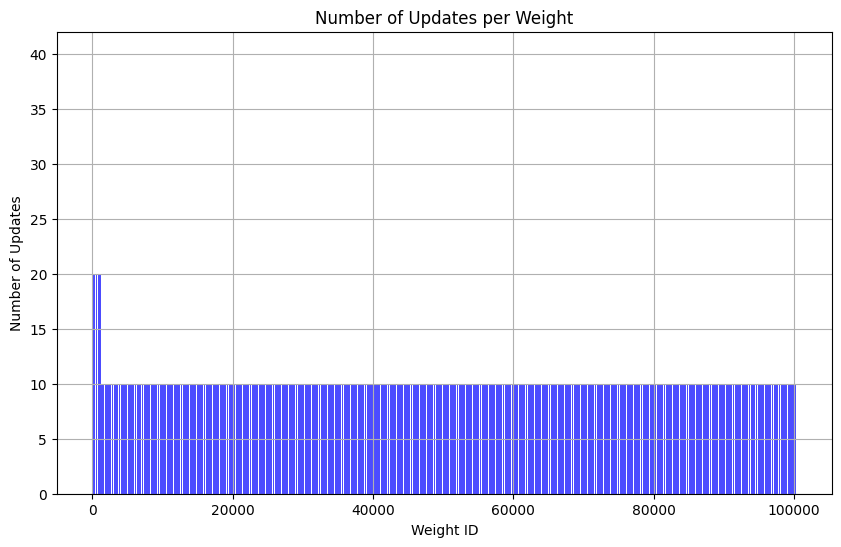

313/313 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.9789
Model Test Loss: 0.07741241157054901
Model Test Accuracy: 0.9789000153541565


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and preprocess data
data = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu", name='hidden_layer1'),
    keras.layers.Dense(10, activation="softmax", name='output_layer')
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Custom callback to track weight updates
class WeightUpdateTracker(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        # Initialize dictionaries to store weight updates
        self.weight_update_counts = {}
        self.layer_weight_ids = []

        # Assign unique IDs to weights
        id_counter = 0
        for layer in self.model.layers:
            layer_weights = layer.get_weights()
            if len(layer_weights) > 0:
                weight_ids = {}
                for weights in layer_weights:
                    ids = np.arange(id_counter, id_counter + weights.size).reshape(weights.shape)
                    for id_ in ids.flatten():
                        weight_ids[id_] = 0
                    id_counter += weights.size
                self.layer_weight_ids.append(weight_ids)

    def on_epoch_end(self, epoch, logs=None):
        # Track weight updates
        weight_ids = self.layer_weight_ids
        for layer_idx, layer in enumerate(self.model.layers):
            layer_weights = layer.get_weights()

            if len(layer_weights) > 0:
                flattened_weights = np.concatenate([weights.flatten() for weights in layer_weights])
                ids = np.concatenate([np.arange(start, start + w.size) for start, w in enumerate(layer_weights)])

                for weight_id, weight_value in zip(ids, flattened_weights):
                    if weight_value != 0:  # Consider non-zero weights as updated
                        if weight_id not in self.weight_update_counts:
                            self.weight_update_counts[weight_id] = 0
                        self.weight_update_counts[weight_id] += 1

    def on_train_end(self, logs=None):
        # Plot the weight update counts
        plt.figure(figsize=(10, 6))
        weights_ids = list(self.weight_update_counts.keys())
        update_counts = list(self.weight_update_counts.values())

        plt.bar(weights_ids, update_counts, color='blue', alpha=0.7)
        plt.xlabel('Weight ID')
        plt.ylabel('Number of Updates')
        plt.title('Number of Updates per Weight')
        plt.grid(True)
        plt.show()

# Train the model with the custom callback
model.fit(training_images, training_labels, epochs=10, callbacks=[WeightUpdateTracker()])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Model Test Loss: {test_loss}")
print(f"Model Test Accuracy: {test_accuracy}")


# now find number of times each weight is updated and plot an update table with following :
# weight id | number of updates

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and preprocess data
data = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu", name='hidden_layer1'),
    keras.layers.Dense(10, activation="softmax", name='output_layer')
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Custom callback to track weight updates
class WeightUpdateTracker(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.weight_update_count = {}
        self.previous_weights = {}

        for layer_idx, layer in enumerate(self.model.layers):
            if len(layer.get_weights()) > 0:
                weights = layer.get_weights()
                for weight_idx, weight_array in enumerate(weights):
                    weight_shape = weight_array.shape
                    flat_weights = weight_array.flatten()

                    for idx, weight in enumerate(flat_weights):
                        self.weight_update_count[(layer_idx, weight_idx, idx)] = 0
                        self.previous_weights[(layer_idx, weight_idx, idx)] = weight

    def on_epoch_end(self, epoch, logs=None):
        for layer_idx, layer in enumerate(self.model.layers):
            if len(layer.get_weights()) > 0:
                weights = layer.get_weights()
                for weight_idx, weight_array in enumerate(weights):
                    flat_weights = weight_array.flatten()

                    for idx, weight in enumerate(flat_weights):
                        key = (layer_idx, weight_idx, idx)
                        if key in self.previous_weights:
                            if weight != self.previous_weights[key]:
                                self.weight_update_count[key] += 1
                                self.previous_weights[key] = weight

# Train the model with the custom callback
tracker = WeightUpdateTracker()
model.fit(training_images, training_labels, epochs=10, callbacks=[tracker])

# Create a DataFrame to display the number of updates
update_data = {
    'Layer Index': [key[0] for key in tracker.weight_update_count.keys()],
    'Weight Index': [key[1] for key in tracker.weight_update_count.keys()],
    'Flat Index': [key[2] for key in tracker.weight_update_count.keys()],
    'Number of Updates': list(tracker.weight_update_count.values())
}

df_update = pd.DataFrame(update_data)

# Plot the update table
plt.figure(figsize=(12, 8))
plt.table(cellText=df_update.values, colLabels=df_update.columns, cellLoc='center', loc='center')
plt.axis('off')
plt.title('Weight Update Counts')
plt.show()


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 21s 10ms/step - loss: 0.2589 - accuracy: 0.9251
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1157 - accuracy: 0.9653
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0801 - accuracy: 0.9757
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0594 - accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0465 - accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0356 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0294 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0224 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0190 - accuracy: 0.9942
Epoch 10/10
187

ValueError: Image size of 950x1696203 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x800 with 1 Axes>

# take random 100 - 100 samples from each class and see which nodes have zero output in each class or have zero contribution

In [ ]:
import numpy as np

def get_random_samples_per_class(test_images, test_labels, num_samples_per_class=100):
    samples_per_class = {i: [] for i in range(10)}  # For MNIST, we have 10 classes (0-9)

    for i in range(len(test_labels)):
        label = test_labels[i]
        if len(samples_per_class[label]) < num_samples_per_class:
            samples_per_class[label].append(test_images[i])

        if all(len(samples) >= num_samples_per_class for samples in samples_per_class.values()):
            break

    random_samples = np.concatenate([np.array(samples) for samples in samples_per_class.values()])
    random_labels = np.concatenate([np.full(num_samples_per_class, i) for i in range(10)])

    return random_samples, random_labels

random_images, random_labels = get_random_samples_per_class(test_images, test_labels)


NameError: name 'test_images' is not defined

In [ ]:
def analyze_zero_outputs(model, images):
    layer_outputs = []

    # Create a model that outputs activations of all layers
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=[layer.output for layer in model.layers])

    # Get activations for the input images
    activations = activation_model.predict(images)

    # Analyze activations for each layer
    zero_outputs = {}

    for layer_idx, layer_activation in enumerate(activations):
        # For Dense layers, layer_activation is of shape (num_samples, num_nodes)
        if len(layer_activation.shape) == 2:
            zero_output_nodes = np.where(np.all(layer_activation == 0, axis=0))[0]
            if zero_output_nodes.size > 0:
                zero_outputs[layer_idx] = zero_output_nodes

    return zero_outputs

zero_outputs = analyze_zero_outputs(model, random_images)


32/32 [==============================] - 1s 8ms/step


Layer 0: Nodes with zero output: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  78  79  80  81  82  83  84  85  86  87  88 108 109 110 111
 112 113 114 138 139 140 141 142 167 168 169 195 196 197 223 224 251 308
 309 334 335 336 337 362 363 364 365 366 391 392 393 394 419 420 421 422
 448 449 450 476 477 478 504 505 506 530 531 532 533 534 559 560 561 587
 588 589 615 616 617 642 643 644 645 646 647 670 671 672 673 674 675 698
 699 700 701 702 703 724 725 726 727 728 729 730 731 732 733 750 751 752
 753 754 755 756 757 758 759 760 761 762 763 764 765 766 776 777 778 779
 780 781 782 783]


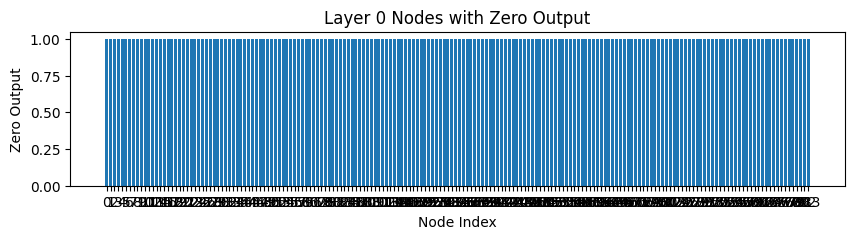

Layer 1: Nodes with zero output: [29]


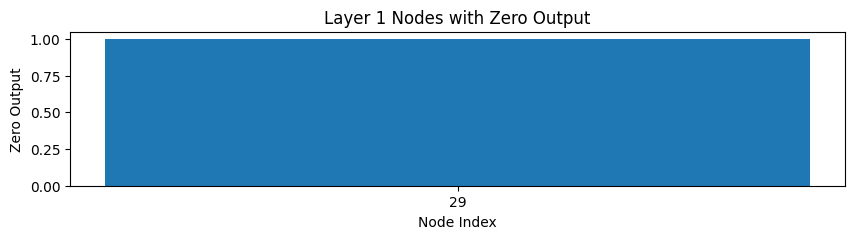

In [ ]:
import matplotlib.pyplot as plt

def plot_zero_outputs(zero_outputs):
    for layer_idx, nodes in zero_outputs.items():
        print(f"Layer {layer_idx}: Nodes with zero output: {nodes}")
        plt.figure(figsize=(10, 2))
        plt.bar(range(len(nodes)), np.ones_like(nodes), tick_label=nodes)
        plt.xlabel('Node Index')
        plt.ylabel('Zero Output')
        plt.title(f'Layer {layer_idx} Nodes with Zero Output')
        plt.show()

plot_zero_outputs(zero_outputs)


 in above diagram
 image with black pixels are zero <- no use

 in layer 1 only node 29 have zero output or not comtributing in any classification